In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
from calendar import monthrange

In [26]:
df = pd.read_excel(r'/home/vipin/sem-7/BTP/BTP Data-001/BTP Data/Rainfall Data/7Palakkad-Alathur.xlsx',
                   header=None)

In [27]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,ALATHUR,HYDRO,Distt.,:,PALAKKAD,CATCHMENT,No.,:,101,LATITUDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
2,1974,3,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,51,0,NaN
4,1974,5,27,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,7,0,36
5,1974,6,9,0,0,0,0,0,0,0,...,0.4,18,0,0,17,0,0,25,12,NaN
6,1974,7,6,15,2,39,67,55,15,3,...,26,3,46,46,74,33,21,14,30,39
7,1974,8,12,33,28,11,7,10,0,2,...,0,0,0,0,5,0,0,1,0,0
8,1974,9,0,0,0,0,0,2,1,0,...,6,0,0,76,18,8,14,14,14,NaN
9,1975,6,12,7,37,3,2,8,25,6,...,43,18,46,38,26,92,35,10,37,NaN


In [28]:
df.columns = df.iloc[1]
df

1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,ALATHUR,HYDRO,Distt.,:,PALAKKAD,CATCHMENT,No.,:,101,LATITUDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
2,1974,3,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,51,0,NaN
4,1974,5,27,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,7,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2015,8,0,0,0,14,1,9,0.3,22.7,...,3.7,0,1.5,0,0,0,3.5,0,0,0
463,2015,9,0,0,0,0.5,3.7,4.5,0.5,4.5,...,0,0,0,0,0,2.5,39,1.1,65.5,NaN
464,2015,10,7,1,0,3.5,5.5,3.3,8.4,0.5,...,0,0,0,0,0,5.5,0.1,2.5,0,8.6
465,2015,11,0.2,4,0,3.6,72.2,0,0.1,11.5,...,0,0,0.7,0,0,0,0,0,0,NaN


In [29]:
df = df.drop([0,1])

In [30]:
df

1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
2,1974,3,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,51,0,NaN
4,1974,5,27,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,7,0,36
5,1974,6,9,0,0,0,0,0,0,0,...,0.4,18,0,0,17,0,0,25,12,NaN
6,1974,7,6,15,2,39,67,55,15,3,...,26,3,46,46,74,33,21,14,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2015,8,0,0,0,14,1,9,0.3,22.7,...,3.7,0,1.5,0,0,0,3.5,0,0,0
463,2015,9,0,0,0,0.5,3.7,4.5,0.5,4.5,...,0,0,0,0,0,2.5,39,1.1,65.5,NaN
464,2015,10,7,1,0,3.5,5.5,3.3,8.4,0.5,...,0,0,0,0,0,5.5,0.1,2.5,0,8.6
465,2015,11,0.2,4,0,3.6,72.2,0,0.1,11.5,...,0,0,0.7,0,0,0,0,0,0,NaN


In [31]:
df = df[df.YEAR != 1974]
df = df[df.YEAR != 1975]
df = df[df.YEAR != 2012]
df = df[df.YEAR != 2013]
df = df[df.YEAR != 2015]

In [32]:
df

1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
15,1976,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1976,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
17,1976,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1976,4,0,48,0,11,0,0,0,0,...,0,16,16,0,0,17,0,18,64,NaN
19,1976,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2011,8,16.5,9.5,19.2,11,14.5,48,56.8,2.7,...,3.5,0.5,1,1.5,2.5,0,0,6,7,22
443,2011,9,40,12.5,66.5,14.7,6.1,0.5,8.8,6.5,...,5,1.7,0,0.5,0,0,0,0,0,NaN
444,2011,10,0,0,0,0,0,0,0,0,...,21.2,22,54.2,1,6.9,0,18.6,0,18,4
445,2011,11,0,64.1,27.5,43.8,0,59.2,16.5,6.5,...,0,0,0,0,1.8,1.5,0,2,0,NaN


In [33]:
df.reset_index(drop= True ,inplace = True) 
df

1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,1976,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1976,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1976,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1976,4,0,48,0,11,0,0,0,0,...,0,16,16,0,0,17,0,18,64,NaN
4,1976,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2011,8,16.5,9.5,19.2,11,14.5,48,56.8,2.7,...,3.5,0.5,1,1.5,2.5,0,0,6,7,22
428,2011,9,40,12.5,66.5,14.7,6.1,0.5,8.8,6.5,...,5,1.7,0,0.5,0,0,0,0,0,NaN
429,2011,10,0,0,0,0,0,0,0,0,...,21.2,22,54.2,1,6.9,0,18.6,0,18,4
430,2011,11,0,64.1,27.5,43.8,0,59.2,16.5,6.5,...,0,0,0,0,1.8,1.5,0,2,0,NaN


In [34]:
# for col in df.columns: 
#     #print(col)
#     if(col!= 'DRF31' and col!= 'DRF30' and col!= 'DRF29'):
#         df[col] = df[col].fillna(0)

df = df.fillna(0)

In [35]:
#y = df.YEAR.tolist()
#from itertools import groupby
#[len(list(group)) for key, group in groupby(y)]

In [36]:
df.isna().sum()

1
YEAR     0
MN       0
DRF01    0
DRF02    0
DRF03    0
DRF04    0
DRF05    0
DRF06    0
DRF07    0
DRF08    0
DRF09    0
DRF10    0
DRF11    0
DRF12    0
DRF13    0
DRF14    0
DRF15    0
DRF16    0
DRF17    0
DRF18    0
DRF19    0
DRF20    0
DRF21    0
DRF22    0
DRF23    0
DRF24    0
DRF25    0
DRF26    0
DRF27    0
DRF28    0
DRF29    0
DRF30    0
DRF31    0
dtype: int64

In [37]:
df

1,YEAR,MN,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,1976,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1976,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1976,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1976,4,0.0,48.0,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,16.0,16.0,0.0,0.0,17.0,0.0,18.0,64.0,0.0
4,1976,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2011,8,16.5,9.5,19.2,11.0,14.5,48.0,56.8,2.7,...,3.5,0.5,1.0,1.5,2.5,0.0,0.0,6.0,7.0,22.0
428,2011,9,40.0,12.5,66.5,14.7,6.1,0.5,8.8,6.5,...,5.0,1.7,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
429,2011,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.2,22.0,54.2,1.0,6.9,0.0,18.6,0.0,18.0,4.0
430,2011,11,0.0,64.1,27.5,43.8,0.0,59.2,16.5,6.5,...,0.0,0.0,0.0,0.0,1.8,1.5,0.0,2.0,0.0,0.0


In [38]:
df = df.drop(columns=['YEAR', 'MN'])
df

1,DRF01,DRF02,DRF03,DRF04,DRF05,DRF06,DRF07,DRF08,DRF09,DRF10,...,DRF22,DRF23,DRF24,DRF25,DRF26,DRF27,DRF28,DRF29,DRF30,DRF31
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,48.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,16.0,0.0,0.0,17.0,0.0,18.0,64.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,16.5,9.5,19.2,11.0,14.5,48.0,56.8,2.7,36.0,16.4,...,3.5,0.5,1.0,1.5,2.5,0.0,0.0,6.0,7.0,22.0
428,40.0,12.5,66.5,14.7,6.1,0.5,8.8,6.5,0.0,8.0,...,5.0,1.7,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.2,22.0,54.2,1.0,6.9,0.0,18.6,0.0,18.0,4.0
430,0.0,64.1,27.5,43.8,0.0,59.2,16.5,6.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.8,1.5,0.0,2.0,0.0,0.0


In [39]:
df['Monthly'] = df.sum(axis=1)
#df = df['Monthly']
#df

In [40]:
mon_rf = df['Monthly'].to_numpy().tolist()    

In [41]:
# listOfDFRows = df.to_numpy().tolist()
# listOfDFRows

# k=0
# RF_val = []

# for y in range(1976 , 2012):
#     for m in range(1,13):
#         a,b = monthrange(y, m)
#         #print(y,m)
#         RF_val.append(listOfDFRows[k][0:b])
#         #print(len(rt))
#         k=k+1

In [42]:
k

NameError: name 'k' is not defined

In [43]:
#listOfDFRows = df.to_numpy().tolist()
# #listOfDFRows
# RF_val = []
# l = []
# for i in listOfDFRows:
#     for j in i:
#         if (math.isnan(j) != True):
#             #isinstance(int(j), int) # True
#             RF_val.append(j)
#             if(isinstance(j, int)):
#                 print(j)
RF_val = [item for sublist in listOfDFRows for item in sublist]
#RF_val = [x for x in RF_val if str(x) != 'nan']

NameError: name 'listOfDFRows' is not defined

In [44]:
# for i in RF_val:
#     print(i)

In [45]:
year = []
mon = []
for y in range(1976 , 2012):
    for m in range(1,13):
        year.append(y)
        mon.append(m)

In [46]:
mon

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,

In [47]:
new_df = pd.DataFrame(list(zip(year, mon, mon_rf)), 
               columns =['Year','Month', 'RF']) 

In [48]:
new_df

,Year,Month,RF
0,1976,1,0.0
1,1976,2,0.0
2,1976,3,0.0
3,1976,4,200.0
4,1976,5,52.0
...,...,...,...
427,2011,8,405.1
428,2011,9,244.7
429,2011,10,177.1
430,2011,11,222.9


In [19]:
indx_date = []
start_date = datetime.date(1976, 1, 1)
end_date = datetime.date(2011, 12, 31)
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    indx_date.append(start_date)
    start_date += delta

In [20]:
len(indx_date)

13149

In [159]:
p_31 = 0
p_30 = 0
p_29 = 0
p_28 = 0
x= 0
from calendar import monthrange
for y in range(1976 , 2012):
    for m in range(1,13):
        a,b = monthrange(y, m)
        if(b == 31):
            p_31 = p_31 + 1
        elif(b == 30):
            p_30 = p_30 + 1
        elif(b == 29):
            p_29 = p_29 + 1
        elif(b == 28):
            p_28 = p_28 + 1
        x = x+1  

In [160]:
print(p_31)
print(p_30)
print(p_29)
print(p_28)
print(x)

252
144
9
27
432


In [21]:
new_df = pd.DataFrame(list(zip(indx_date, RF_val)), 
               columns =['Date', 'RF']) 

NameError: name 'RF_val' is not defined

In [162]:
new_df.to_csv('/home/vipin/sem-7/BTP/BTP Data-001/BTP Data/Rainfall Data/7Palakkad-Alathur_processed.csv'
              ,index=False)
new_df

,Date,RF
0,1976-01-01,0.0
1,1976-01-02,0.0
2,1976-01-03,0.0
3,1976-01-04,0.0
4,1976-01-05,0.0
...,...,...
13144,2011-12-27,3.0
13145,2011-12-28,0.0
13146,2011-12-29,3.5
13147,2011-12-30,2.0


In [29]:
new_df.Date = pd.to_datetime(new_df.Date)

In [233]:
new_df.to_csv('/home/vipin/sem-7/BTP/BTP Data-001/BTP Data/Rainfall Data/7Palakkad-Alathur_monthly.csv'
              ,index=False)

NameError: name 'new_df' is not defined

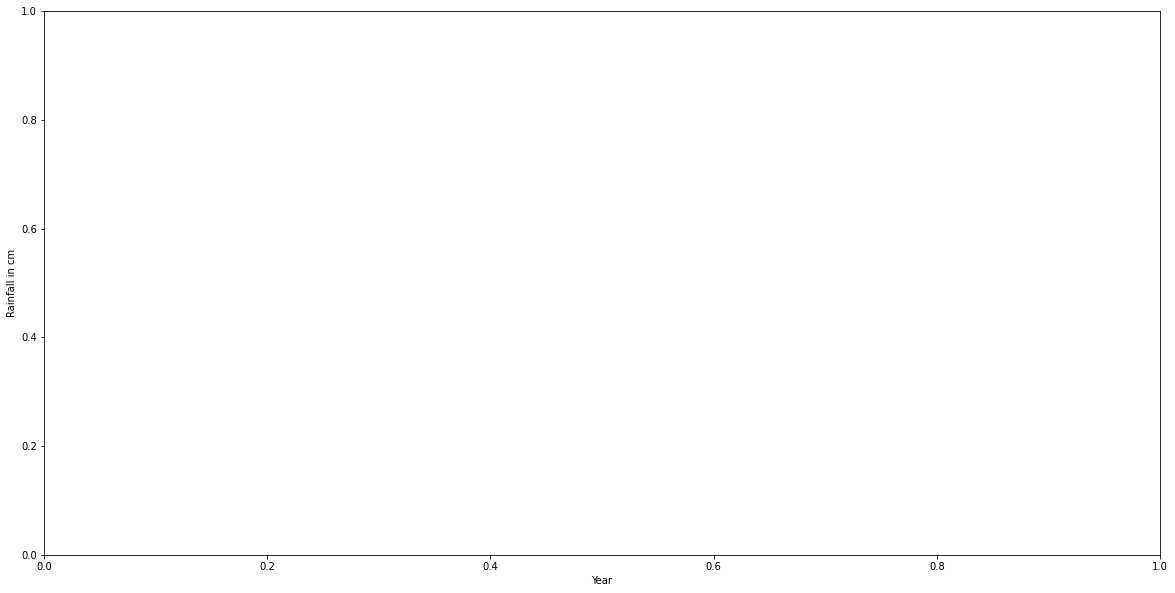

In [17]:
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Rainfall in cm')
plt.plot(new_df['Date'] , new_df['RF'],label='Daily rainfall')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#apply adf test on the series
adf_test(new_df['RF'])

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(new_df['RF'])

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(new_df['RF'], nlags=100)
lag_pacf = pacf(new_df['RF'], nlags=100, method='ols')

In [ ]:
#p = 68

#Plot ACF: 
#plt.subplot(121)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df['RF'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df['RF'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
print(1.96/np.sqrt(len(new_df['RF'])))
lag_acf

In [ ]:
#q = 17

#Plot PACF:
plt.figure(figsize = (15,10))
plt.plot(lag_pacf)
plt.xlabel('Lags')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df['RF'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df['RF'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlim(0, 40)
plt.ylim(-0.1, 0.2)
plt.annotate('Inside 99% confidence interval at lag = 16 ', xy=(16, -0.006634360150502235), xytext=(15 , -0.04),
             arrowprops=dict(facecolor='black',shrink=1),
             )
plt.tight_layout()


In [ ]:
lag_pacf[16]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(new_df['RF'], order=(10, 0, 0))
results_AR = model.fit(disp=1)

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(new_df['Date'], new_df['RF'], label = 'Actual Rainfall')
plt.plot(new_df['Date'], results_AR.fittedvalues, color='red', label = 'Fitted Rainfall')
plt.title('fitting of ARIMA model')
plt.xlabel('Year')
plt.ylabel('Rainfall in cm')
plt.legend(loc="upper left")
sum((results_AR.fittedvalues-new_df['RF'])**2)

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
#ax1 = plt.subplot(212)
#ax1.margins(5)
plt.figure(figsize = (15,10))
#ax.margins(0.05)           # Default margin is 0.05, value 0 means fit
autocorrelation_plot(new_df['RF'])
plt.xlim(0, 80)
plt.ylim(-0.2, 0.2)
plt.annotate('Inside 99% confidence interval at lag = 66 ', xy=(66, 0.01676500110127243), xytext=(59 , 0.08),
             arrowprops=dict(facecolor='black',shrink=1),
             )
plt.show()

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(new_df['RF'], lags=40)
plt.show()

In [ ]:
np.amin(residuals)

In [ ]:
residuals

In [ ]:
from pandas import DataFrame
#model = ARIMA(new_df['RF'], order=(20,0,0))
#model_fit = model.fit(disp=1)
print(results_AR.summary())
# plot residual errors
residuals = DataFrame(results_AR.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
output = results_AR.forecast(20)

In [ ]:
plt.plot(output[0])

In [ ]:
results_AR

In [27]:
import keras

Using TensorFlow backend.


In [26]:
import tensorflow